# Machine Learning Model for Predicting Categories

This notebook demonstrates the process of building a machine learning model to predict categories using the RandomForestClassifier algorithm. It covers essential steps such as data loading, exploratory data analysis (EDA), model training, and evaluation.

## Overview

Machine learning models are employed to predict categories based on input features. This notebook focuses on implementing the RandomForestClassifier to achieve accurate predictions. The steps involved include:

1. **Data Loading and Preparation:** Loading the dataset and preparing features and target variable.
   
2. **Exploratory Data Analysis (EDA):** Exploring the dataset to understand its structure, distribution, and relationships between variables.
   
3. **Data Encoding:** Encoding categorical variables into numerical format suitable for machine learning algorithms.

4. **Model Training:** Utilizing the RandomForestClassifier to train a predictive model using the training dataset.
   
5. **Model Evaluation:** Assessing the performance of the trained model using evaluation metrics such as accuracy and confusion matrix.

6. **Prediction on Test Data:** Using the trained model to make predictions on unseen test data for submission.

By following these steps in sequence, we ensure that the data is properly prepared and the model is trained and evaluated correctly before making predictions on new data.


## 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

## 2. Load Data

In [2]:
df_test = pd.read_csv("/kaggle/input/thapar-summer-school-2024-competition-2/test.csv/test.csv")
df_train = pd.read_csv("/kaggle/input/thapar-summer-school-2024-competition-2/train.csv/train.csv")

In [3]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## 3. Exploratory Data Analysis (EDA)
## 3.1. Descriptive Statistics

In [4]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## 3.2. Missing Values

In [5]:
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## 3.3. Data Visualization
## 3.3.1. Target Distribution

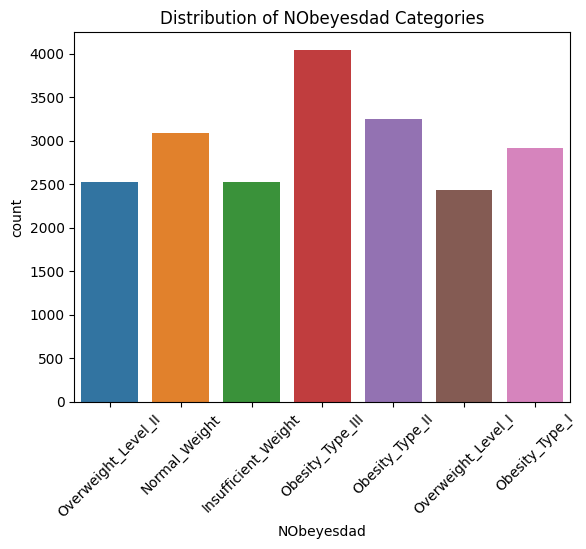

In [6]:
sns.countplot(x='NObeyesdad', data=df_train)
plt.title('Distribution of NObeyesdad Categories')
plt.xticks(rotation=45)
plt.show()


## Data Distribution Visualization

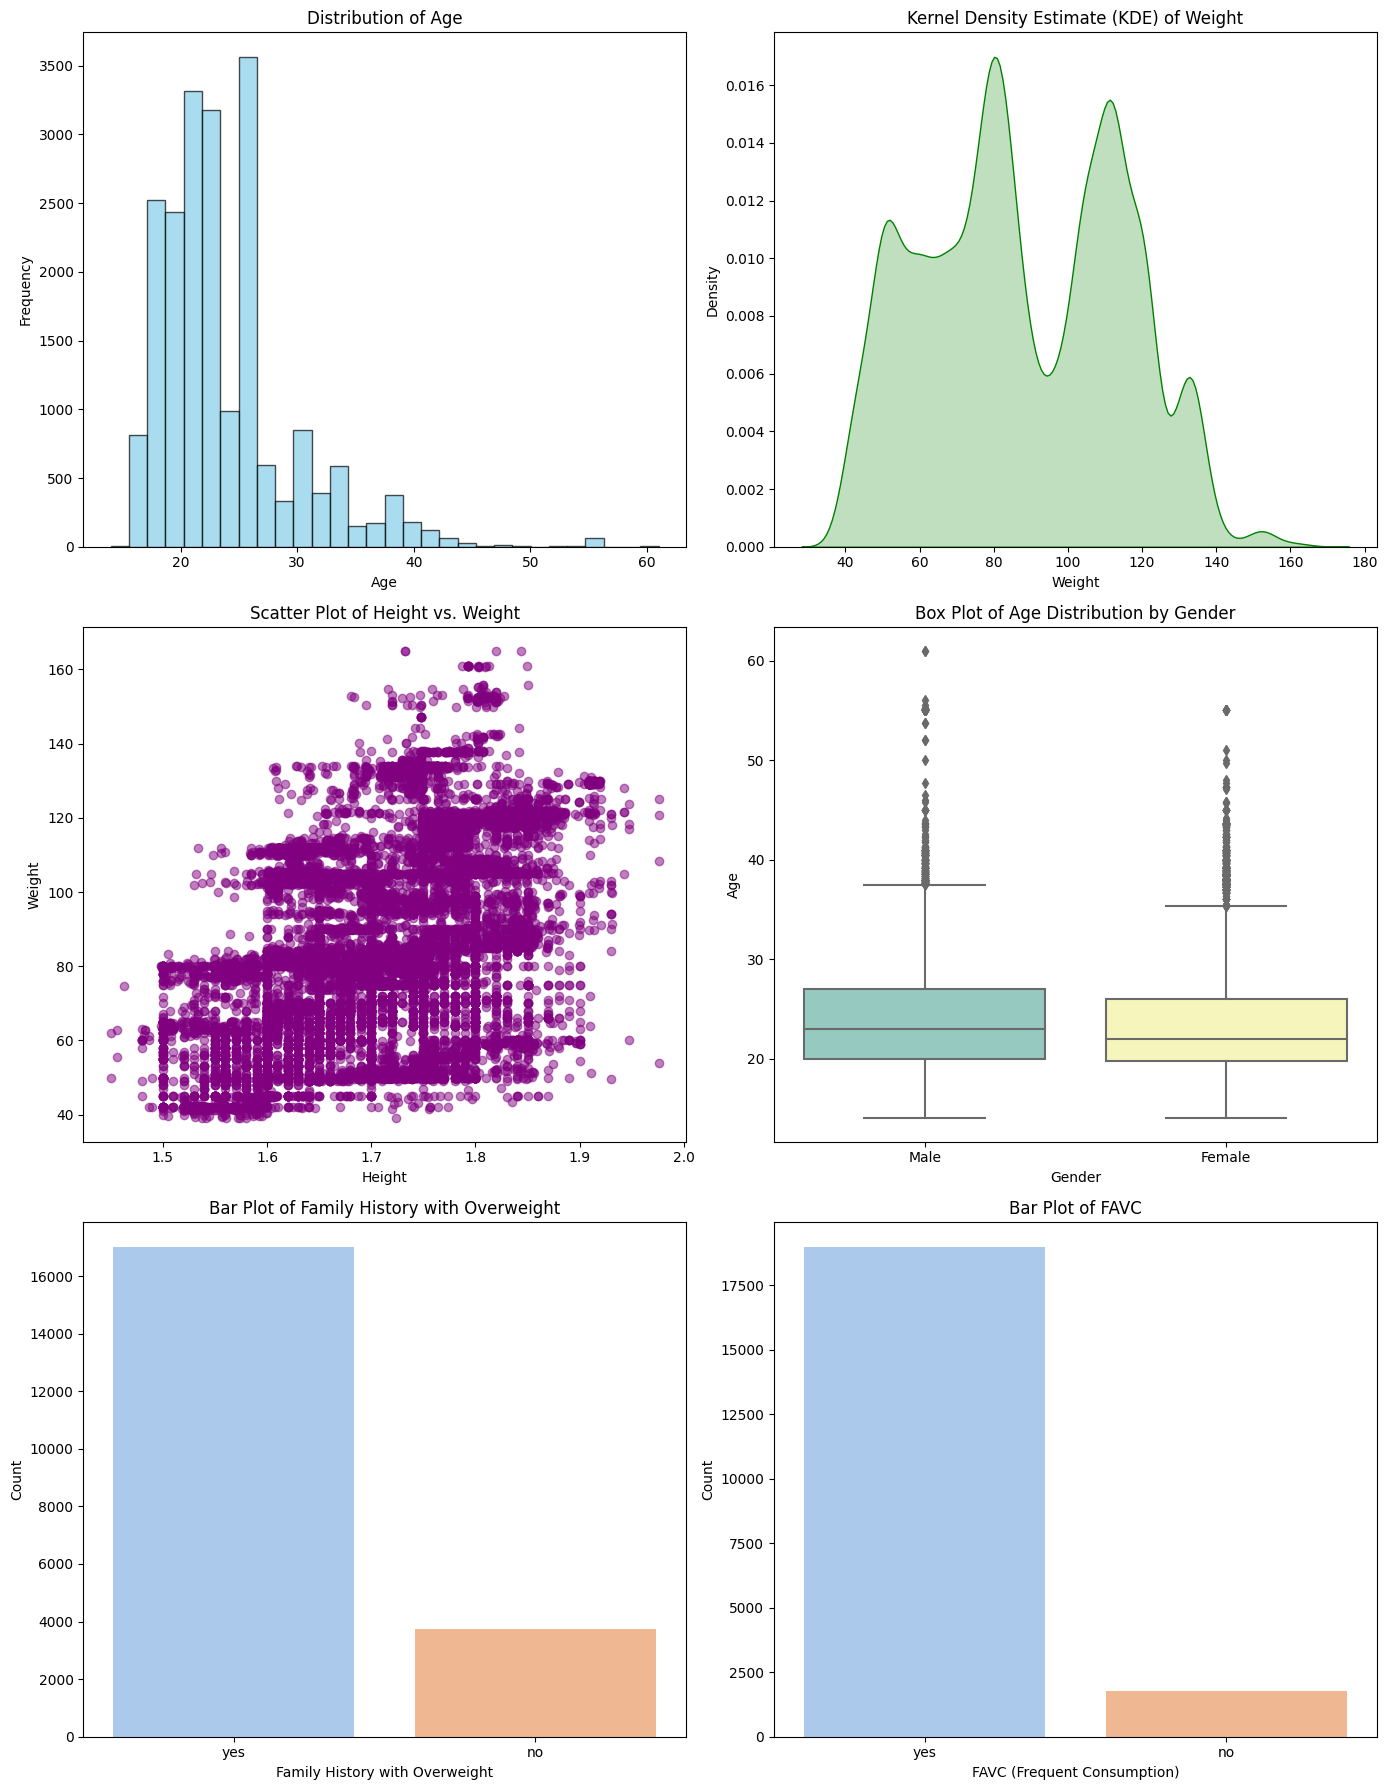

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# For figure grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

#Histogram of Age 
axes[0, 0].hist(df_train['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Age')

# KDE plot of Weight
sns.kdeplot(df_train['Weight'], shade=True, color='green', ax=axes[0, 1])
axes[0, 1].set_xlabel('Weight')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Kernel Density Estimate (KDE) of Weight')

#Scatterplot of Height vs. Weight
axes[1, 0].scatter(df_train['Height'], df_train['Weight'], color='purple', alpha=0.5)
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_ylabel('Weight')
axes[1, 0].set_title('Scatter Plot of Height vs. Weight')

#Boxplot of Age distribution by Gender
sns.boxplot(x='Gender', y='Age', data=df_train, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Age')
axes[1, 1].set_title('Box Plot of Age Distribution by Gender')

#Barplot of family history with overweight
sns.countplot(x='family_history_with_overweight', data=df_train, palette='pastel', ax=axes[2, 0])
axes[2, 0].set_xlabel('Family History with Overweight')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Bar Plot of Family History with Overweight')

#Barplot of FAVC 
sns.countplot(x='FAVC', data=df_train, palette='pastel', ax=axes[2, 1])
axes[2, 1].set_xlabel('FAVC (Frequent Consumption)')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Bar Plot of FAVC')

plt.tight_layout()
plt.show()


In [8]:
print(f'Train lenght: {df_train.shape[0]}')
print(f'Test lenght: {df_test.shape[0]}')

Train lenght: 20758
Test lenght: 13840


# Features related with eating habits:

* FAVC: Frequent consumption of high caloric food;
* FCVC: Frequency of consumption of vegetables;
* NCP: Number of main meals;
* CAEC: Consumption of food between meals;
* CH20: Consumption of water daily;
* CALC: Consumption of alcohol.

# Features related with the physical condition:

* SCC: Calories consumption monitoring
* FAF: Physical activity frequency;
* TUE: Time using technology devices;
* MTRANS: Transportation used.

Incorporating features related to eating habits and physical condition can significantly enhance the effectiveness and relevance of machine learning models, especially in health-related applications. Here are key ways in which these features impact model training:

### 1. Improved Feature Relevance

Features such as `FAVC` (Frequent consumption of high caloric food), `FCVC` (Frequency of consumption of vegetables), `NCP` (Number of main meals), `CAEC` (Consumption of food between meals), `CH2O` (Consumption of water daily), `CALC` (Consumption of alcohol), `SCC` (Calories consumption monitoring), `FAF` (Physical activity frequency), `TUE` (Time using technology devices), and `MTRANS` (Transportation used) directly relate to behaviors and conditions that impact health outcomes. Including these features ensures that relevant aspects of lifestyle and physical activity are considered during model training.

### 2. Better Model Interpretability

These features provide interpretable indicators of health-related behaviors and conditions. Models trained with these features can offer insights into how specific habits or conditions contribute to predicted outcomes, enhancing transparency and understanding.

### 3. Enhanced Predictive Power

By encompassing a broader range of variables that influence health, models can capture more nuanced relationships and patterns. This leads to improved predictive power, particularly in predicting health outcomes such as obesity levels or disease risk.

### 4. Holistic Approach to Health Modeling

The inclusion of both dietary habits and physical condition features enables a more comprehensive approach to health modeling. This approach uncovers interactions and synergies between different lifestyle factors that affect health outcomes, supporting more holistic recommendations and interventions.


In [9]:
df_train.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

# It is a Multiclass Classification problem

## 3.3.2.  Encoding Categorical Variables

To prepare categorical variables for machine learning models, we use `LabelEncoder` from the `sklearn.preprocessing` module. This transformation converts categorical labels into numerical values suitable for training machine learning algorithms.


In [10]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
df_train['Gender']= label_encoder.fit_transform(df_train['Gender']) 
df_train['family_history_with_overweight']= label_encoder.fit_transform(df_train['family_history_with_overweight']) 
df_train['FAVC']= label_encoder.fit_transform(df_train['FAVC']) 
df_train['CAEC']= label_encoder.fit_transform(df_train['CAEC']) 
df_train['SMOKE']= label_encoder.fit_transform(df_train['SMOKE']) 
df_train['SCC']= label_encoder.fit_transform(df_train['SCC']) 
df_train['CALC']= label_encoder.fit_transform(df_train['CALC']) 
df_train['MTRANS']= label_encoder.fit_transform(df_train['MTRANS']) 
#df_train['NObeyesdad']= label_encoder.fit_transform(df_train['NObeyesdad']) 


In [11]:
df_train.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3,Obesity_Type_II
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3,Insufficient_Weight
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3,Obesity_Type_II
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0,Overweight_Level_II
20757,20757,1,26.680376,1.816547,118.134898,1,1,3.000000,3.000000,2,0,2.003563,0,0.684487,0.713823,1,3,Obesity_Type_II


## 3.3.3. Feature Correlation

In [12]:
df_corr=df_train.drop(['id','NObeyesdad'], axis=1)

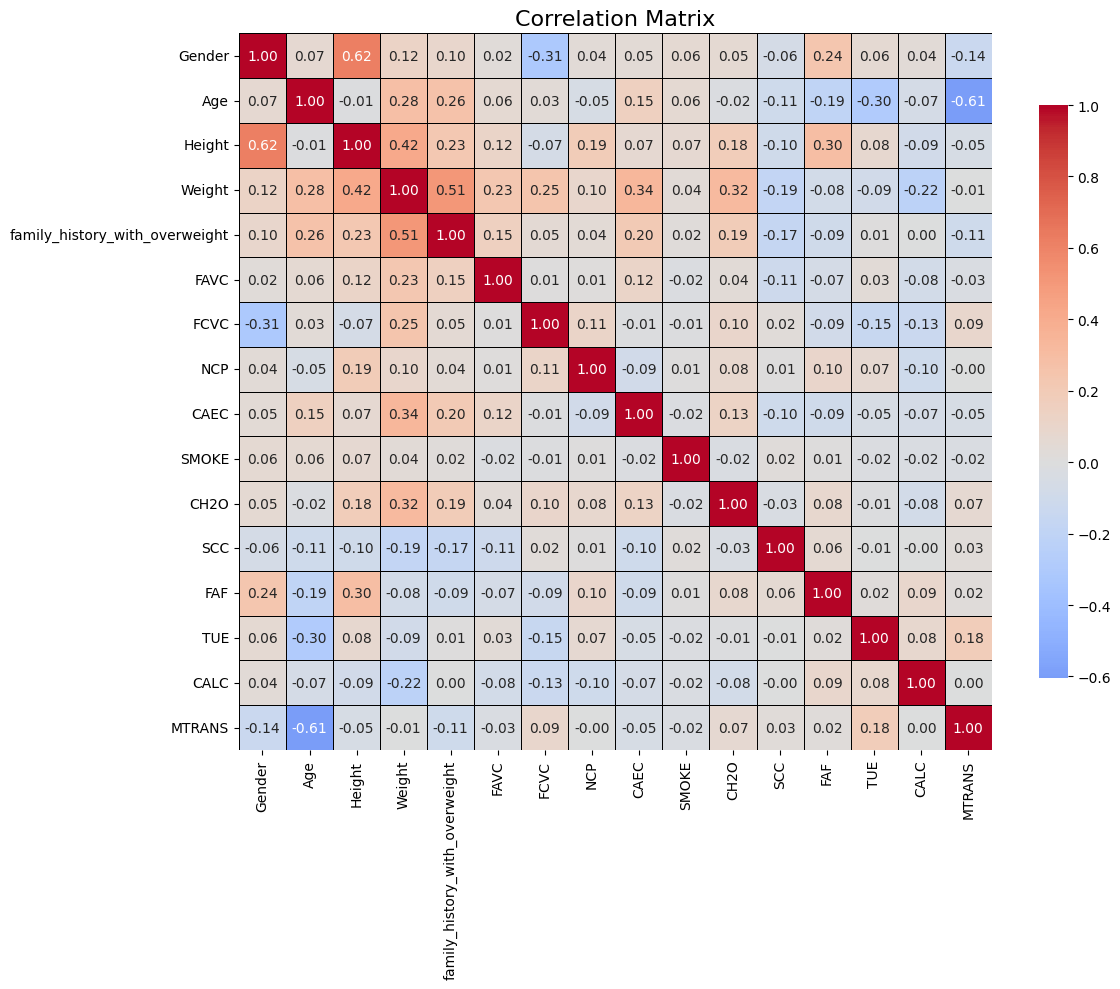

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr.dropna(subset=df_corr.select_dtypes('number').columns, inplace=True)
corr = df_corr.select_dtypes('number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', fmt='.2f', 
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()



## 3.3.4. Target Variable Selection

In [14]:
y = df_train["NObeyesdad"]

In [15]:
features = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']
X = df_train[features]
X_val = df_test[features]

## 4. Splitting Data for Training and Validation

In [16]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## 5. Training the RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.4f}%".format(accuracy * 100))


Accuracy: 89.9326%


## 6. Evaluating Model Performance

Accuracy: 89.9326%
Confusion Matrix:
[[483  37   0   0   0   3   1]
 [ 23 558   0   0   0  40   5]
 [  2   2 474  11   1  15  38]
 [  0   0  14 640   2   0   1]
 [  0   0   0   1 802   1   0]
 [  1  49   8   0   0 365  61]
 [  0  13  38   4   0  47 412]]


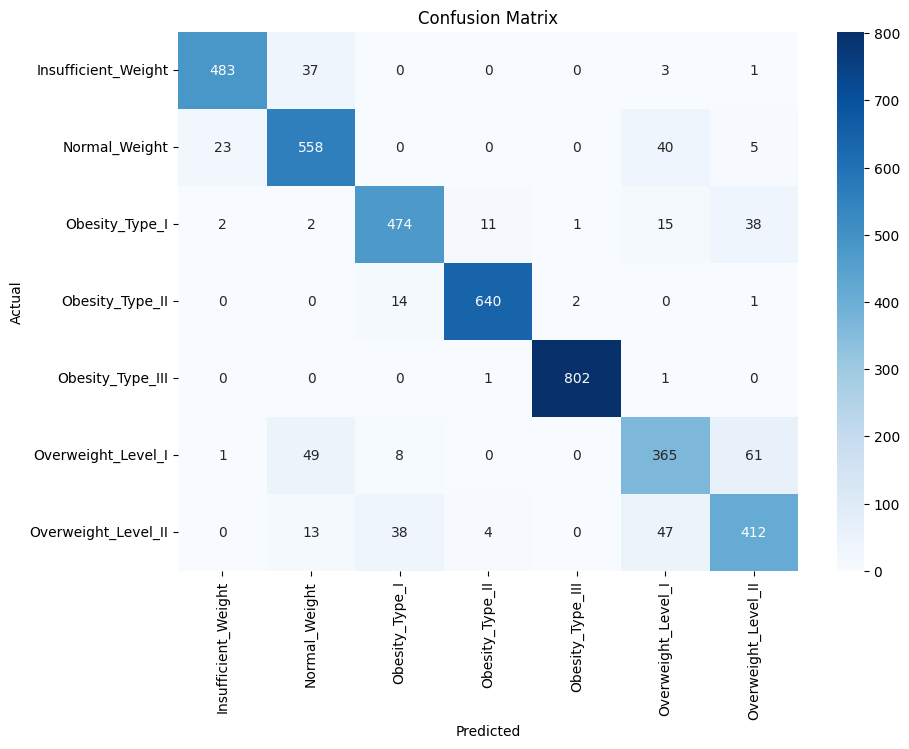

In [18]:
predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.4f}%".format(accuracy * 100))

conf_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_mat)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 7. Encoding and Making Predictions on Test Data

In [19]:
X_val['Gender']= label_encoder.fit_transform(X_val['Gender']) 
X_val['family_history_with_overweight']= label_encoder.fit_transform(X_val['family_history_with_overweight']) 
X_val['FAVC']= label_encoder.fit_transform(X_val['FAVC']) 
X_val['CAEC']= label_encoder.fit_transform(X_val['CAEC']) 
X_val['SMOKE']= label_encoder.fit_transform(X_val['SMOKE']) 
X_val['SCC']= label_encoder.fit_transform(X_val['SCC']) 
X_val['CALC']= label_encoder.fit_transform(X_val['CALC']) 
X_val['MTRANS']= label_encoder.fit_transform(X_val['MTRANS']) 


/tmp/ipykernel_33/2379037875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Gender']= label_encoder.fit_transform(X_val['Gender'])
/tmp/ipykernel_33/2379037875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['family_history_with_overweight']= label_encoder.fit_transform(X_val['family_history_with_overweight'])
/tmp/ipykernel_33/2379037875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [20]:
predictions = model.predict(X_val)
output = pd.DataFrame({ 'Survived': predictions})
output.head()

,Survived
0,Obesity_Type_II
1,Overweight_Level_I
2,Obesity_Type_III
3,Obesity_Type_I
4,Obesity_Type_III


In [21]:
submission_df=pd.merge(df_test['id'],output , left_index=True, right_index=True)
submission_df.head()

,id,Survived
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [22]:
submission_df.to_csv('submission.csv', index=False)